# HW_07 Andrew Lee

## Is there a statistically significant difference in wine bottle cost by wine class? Is this difference impacted when using alcohol percentage as a covariant? Other covariants to investigate: alcohol percentage; color; and hue.

#### Import Data

In [1]:
# import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


df = pd.read_csv('./dataset/wentworth_applied_analytics - wine.csv.csv')

df = df.rename(columns={'Color intensity': 'Color_intensity'})
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,price_usd
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Fig1. Box plot (Price with classes) 


Text(0, 0.5, 'price_usd')

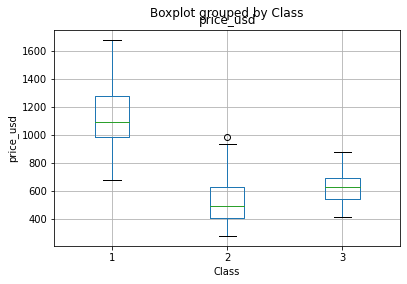

In [64]:
print("Fig1. Box plot (Price with classes) ")
df.boxplot(column='price_usd', by='Class')
plt.xlabel('Class')
plt.ylabel('price_usd')


From the box plot(Fig. 1), we found out there is a obvious differences between the means for each class. But we need to apply ANOVA test to see if the difference is statistically significant.

#### Apply ANVOA test

In [65]:
# fit a one-way ANOVA model with independent variable 'group' and dependent variable 'outcome'
# 'outcome' is the dependent variable and 'group','outcome' is the independent variable
model1 = ols('price_usd ~ Class', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     118.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.23e-21
Time:                        20:43:42   Log-Likelihood:                -1230.3
No. Observations:                 178   AIC:                             2465.
Df Residuals:                     176   BIC:                             2471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1245.9569     49.436     25.203      0.0

In [66]:
anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)

if pv < 0.05:
    print("There is a significant difference between the means in wine bottle cost by wine class.")
else:
    print("There is no significant difference between the means in wine bottle cost by wine class.")

                sum_sq     df           F        PR(>F)
Class     7.049034e+06    1.0  118.116155  2.231319e-21
Residual  1.050347e+07  176.0         NaN           NaN

p-value: 2.231319169403489e-21
There is a significant difference between the means in wine bottle cost by wine class.


Since the p-value is less than 0.5, we will say there is a significant difference between the means of the data sets.

#### Checking fundamental assumption

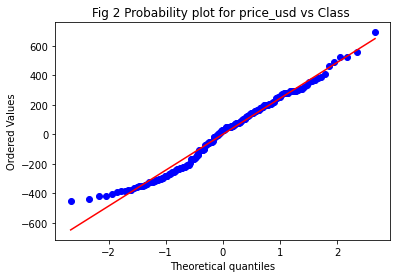

In [67]:
import seaborn as sns
X =df['Class']
y=df['price_usd']
y_pred = model1.predict(X)
residuals = y - y_pred

# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 2 Probability plot for price_usd vs Class ")
plt.show()


From Fig 2 probability plot, we can see the left tail data point are off the distribution, but the right tail datapoint are on the distribution. We can conclue the residuals are sightly not normally distributed.

## ANCOVA Test with alcohol percentage, color, and hue.

### Alcohol percentage

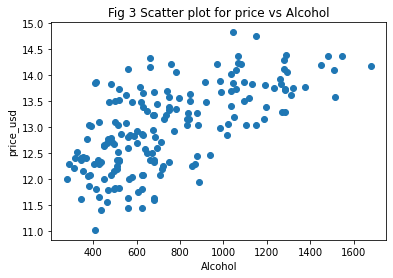

In [68]:
plt.scatter(df.price_usd, df.Alcohol)
plt.xlabel('Alcohol')
plt.ylabel('price_usd')
plt.title("Fig 3 Scatter plot for price vs Alcohol")
plt.show()

In Fig 3 scatter plot, the dependent variable is the price_usd and the conriate is Alcohol. we can see there is a positive trend between price and alcohol, but the data are not clusted and spreaded. 
Therefore, we can conclude both varaiables aren't linear and dependent.

In [69]:
# Use the "price_usd" column as the dependent variable, the "Class" column as the independent variable, and the "Alcohol" column as the covariate
formula = "price_usd ~ Class + Alcohol"
# Fit an OLS model to the data
model2 = ols(formula, df).fit()
# Extract the F-value and p-value from the summary
f_value = model2.fvalue
p_value = model2.f_pvalue
print("ANCOVA Test with alcohol percentage")
print(f"p-value: {p_value}")
if pv < 0.05:
    print("There is a significant difference between the means in wine bottle cost by wine class.")
else:
    print("There is no significant difference between the means in wine bottle cost by wine class.")

ANCOVA Test with alcohol percentage
p-value: 6.1634717983467525e-37
There is a significant difference between the means in wine bottle cost by wine class.


#### Checking fundamental assumption

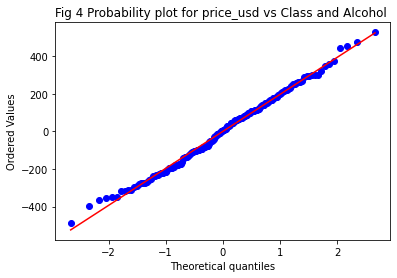

In [77]:
import seaborn as sns
X =df[['Class','Alcohol']]
y=df['price_usd']
y_pred = model2.predict(X)
residuals = y - y_pred

# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 4 Probability plot for price_usd vs Class and Alcohol ")
plt.show()


From Fig 4 probability plot, we can see the data point are off the distribution. We can conclue the residuals are normally distributed.

### Color

There is a significant difference between the means in wine bottle cost by wine class, and the differences isn't impacted by the the use of covariate (alcohol percentage)

Text(0, 0.5, 'price_usd')

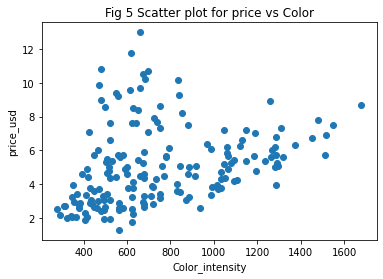

In [79]:
plt.scatter(df.price_usd, df.Color_intensity)
plt.xlabel('Color_intensity')
plt.title("Fig 5 Scatter plot for price vs Color")
plt.ylabel('price_usd')

In Fig 5 scatter plot, the dependent variable is the price_usd and the conriate is Color. we can see there is a no trend between price and color, Therefore, we can conclude both varaiables aren't linear and dependent.

In [72]:
# Use the "price_usd" column as the dependent variable, the "Class" column as the independent variable, and the "Color" column as the covariate
formula = "price_usd ~ Class + Color_intensity"
# Fit an OLS model to the data
model3 = ols(formula, df).fit()
# Extract the F-value and p-value from the summary
p_value = model3.f_pvalue
print("ANCOVA Test with color")
print(f"p-value: {p_value}")
if pv < 0.05:
    print("There is a significant difference between the means in wine bottle cost by wine class.")
else:
    print("There is no significant difference between the means in wine bottle cost by wine class.")

ANCOVA Test with color
p-value: 4.529335598446439e-41
There is a significant difference between the means in wine bottle cost by wine class.


#### Checking fundamental assumption

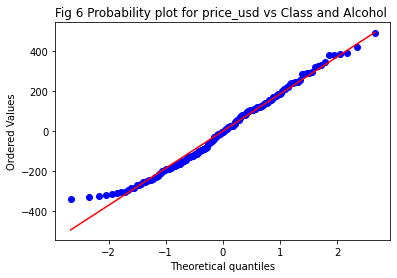

In [78]:
import seaborn as sns
X =df[['Class','Color_intensity']]
y=df['price_usd']
y_pred = model3.predict(X)
residuals = y - y_pred

# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 6 Probability plot for price_usd vs Class and Alcohol ")
plt.show()


From Fig 6 probability plot, we can see the left tail data point are off the distribution, but the right tail datapoint are on the distribution. We can conclue the residuals are sightly not normally distributed.

### Hue

There is a significant difference between the means in wine bottle cost by wine class, and the differences isn't impacted by the the use of covariate (Color intensity)

Text(0, 0.5, 'price_usd')

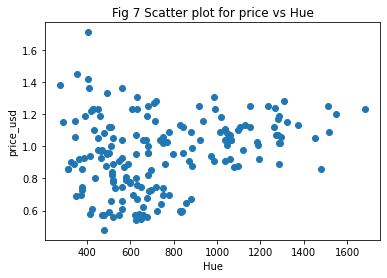

In [74]:
plt.scatter(df.price_usd, df.Hue)
plt.xlabel('Hue')
plt.title ("Fig 7 Scatter plot for price vs Hue")
plt.ylabel('price_usd')

In Fig 7 scatter plot, the dependent variable is the price_usd and the conriate is Hue. we can see there is a no trend between price and color, Therefore, we can conclude both varaiables aren't linear and dependent.

In [75]:
# Use the "price_usd" column as the dependent variable, the "Class" column as the independent variable, and the "Hue" column as the covariate
formula = "price_usd ~ Class + Hue"
# Fit an OLS model to the data
model4 = ols(formula, df).fit()
# Extract the F-value and p-value from the summary
p_value = model4.f_pvalue
print("ANCOVA Test with Hue")
print(f"p-value: {p_value}")
if pv < 0.05:
    print("There is a significant difference between the means in wine bottle cost by wine class.")
else:
    print("There is no significant difference between the means in wine bottle cost by wine class.")

ANCOVA Test with Hue
p-value: 8.633826665110048e-23
There is a significant difference between the means in wine bottle cost by wine class.


#### Checking fundamental assumption

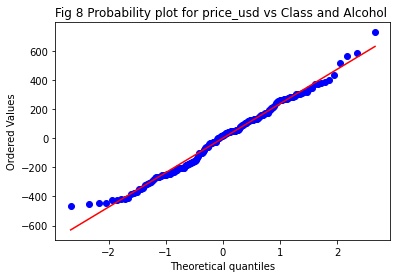

In [76]:
import seaborn as sns
X =df[['Class','Hue']]
y=df['price_usd']
y_pred = model4.predict(X)
residuals = y - y_pred

# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 8 Probability plot for price_usd vs Class and Alcohol ")
plt.show()


From Fig 8 probability plot, we can see the left tail data point are off the distribution, but the right tail datapoint are on the distribution. We can conclue the residuals are sightly not normally distributed.

There is a significant difference between the means in wine bottle cost by wine class, and the differences isn't impacted by the the use of covariate (Hue)

## Conclusion

In conclusion, there is a significant difference between the means in wine bottle cost by wine class, and the differences aren't impacted by the use of covariates (alcohol percentage, color intensity, and hue). But alcohol percentage has a hidden positive trend and it may represent a probability that the wine price and alcohol have a dependent relationship.